<a href="https://colab.research.google.com/github/anandaverry/Ananda-Verry-Setiawan-Data-Mining/blob/main/Ananda_Verry_Setiawan_4101422038_Naive_Bayes_dan_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ananda Verry Setiawan

NIM  : 4101422038

Mata Kuliah : Data Mining


# **NAIVE BAYES**

##**Langkah-Langkan Pemodelan**

1. **Persiapan Data (Data Preparation)**  
Langkah pertama dalam pemodelan adalah mempersiapkan data. Ini mencakup pengumpulan data, pemeriksaan data kosong (missing value), dan pembersihan data (data cleaning) jika diperlukan. Jika terdapat data kategori, maka perlu dilakukan proses encoding untuk mengubah data kategorikal menjadi numerik.

2. **Pemisahan Fitur dan Target (Feature-Target Splitting)**  
Setelah data siap, selanjutnya dilakukan pemisahan antara fitur (variabel independen) dan target (label atau variabel dependen yang ingin diprediksi). Fitur akan digunakan sebagai input model, sedangkan target sebagai output yang akan dipelajari oleh model.

3. **Split Data ke Data Latih dan Uji (Train-Test Split)**  
Dataset kemudian dibagi menjadi dua bagian, yaitu data latih (training set) dan data uji (testing set). Data latih digunakan untuk membangun model, sedangkan data uji digunakan untuk mengukur performa model terhadap data yang belum pernah dilihat sebelumnya.

4. **Pelatihan Model Naive Bayes (Model Training)**  
Setelah pembagian data, algoritma Naive Bayes dilatih menggunakan data latih. Pada tahap ini, model akan menghitung probabilitas prior dari setiap kelas dan probabilitas kondisi (likelihood) setiap fitur terhadap kelas yang ada.

5. **Prediksi Data Uji (Prediction)**  
Model yang sudah dilatih kemudian digunakan untuk melakukan prediksi terhadap data uji. Berdasarkan nilai fitur pada data uji, model akan menghitung probabilitas tiap kelas dan memilih kelas dengan nilai probabilitas tertinggi sebagai hasil prediksi.

6. **Evaluasi Model (Evaluation)**  
Hasil prediksi dibandingkan dengan label sebenarnya dari data uji. Evaluasi dilakukan dengan menghitung metrik seperti akurasi. Selain itu, confusion matrix juga digunakan untuk melihat distribusi prediksi benar dan salah terhadap tiap kelas.

7. **Interpretasi dan Penyimpulan Hasil**  
Langkah terakhir adalah menganalisis hasil evaluasi untuk menentukan apakah model sudah cukup baik. Jika belum, maka dapat dilakukan proses iterasi seperti tuning parameter, pemilihan fitur, atau mencoba pendekatan lain untuk meningkatkan performa model.

##**Evaluasi Model Menggunakan Confusion Matrix dan Akurasi**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [49]:
injury=pd.read_csv('/content/injury_data.csv')

In [50]:
injury.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [51]:
injury.tail(15)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
985,18,75.873311,180.442680,1,0.164287,5,1
986,32,82.024066,181.915393,0,0.783161,4,1
987,19,75.967499,174.402575,0,0.122498,6,1
988,31,73.904507,178.060506,0,0.634907,6,0
989,38,68.959877,173.366957,1,0.123846,5,1
990,25,83.846068,177.052207,0,0.070536,3,0
991,25,65.808199,193.461783,1,0.909430,6,1
992,36,63.896005,169.221282,0,0.190129,1,1
993,24,80.670555,173.112823,1,0.821250,4,1
994,36,61.668427,167.457011,0,0.544631,1,1


In [52]:
count_values = injury['Likelihood_of_Injury'].value_counts()
count_values

,count
Likelihood_of_Injury,
0,500
1,500


In [54]:
# Menghitung rata-rata berdasarkan nilai 'Likelihood_of_Injury'
mean_by_outcome = injury.groupby('Likelihood_of_Injury').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Likelihood_of_Injury'
print(mean_by_outcome)

                      Player_Age  Player_Weight  Player_Height  \
Likelihood_of_Injury                                             
0                         28.230      74.776124     179.457996   
1                         28.232      74.812577     180.043900   

                      Previous_Injuries  Training_Intensity  Recovery_Time  
Likelihood_of_Injury                                                        
0                                 0.496            0.465009          3.492  
1                                 0.534            0.516067          3.440  


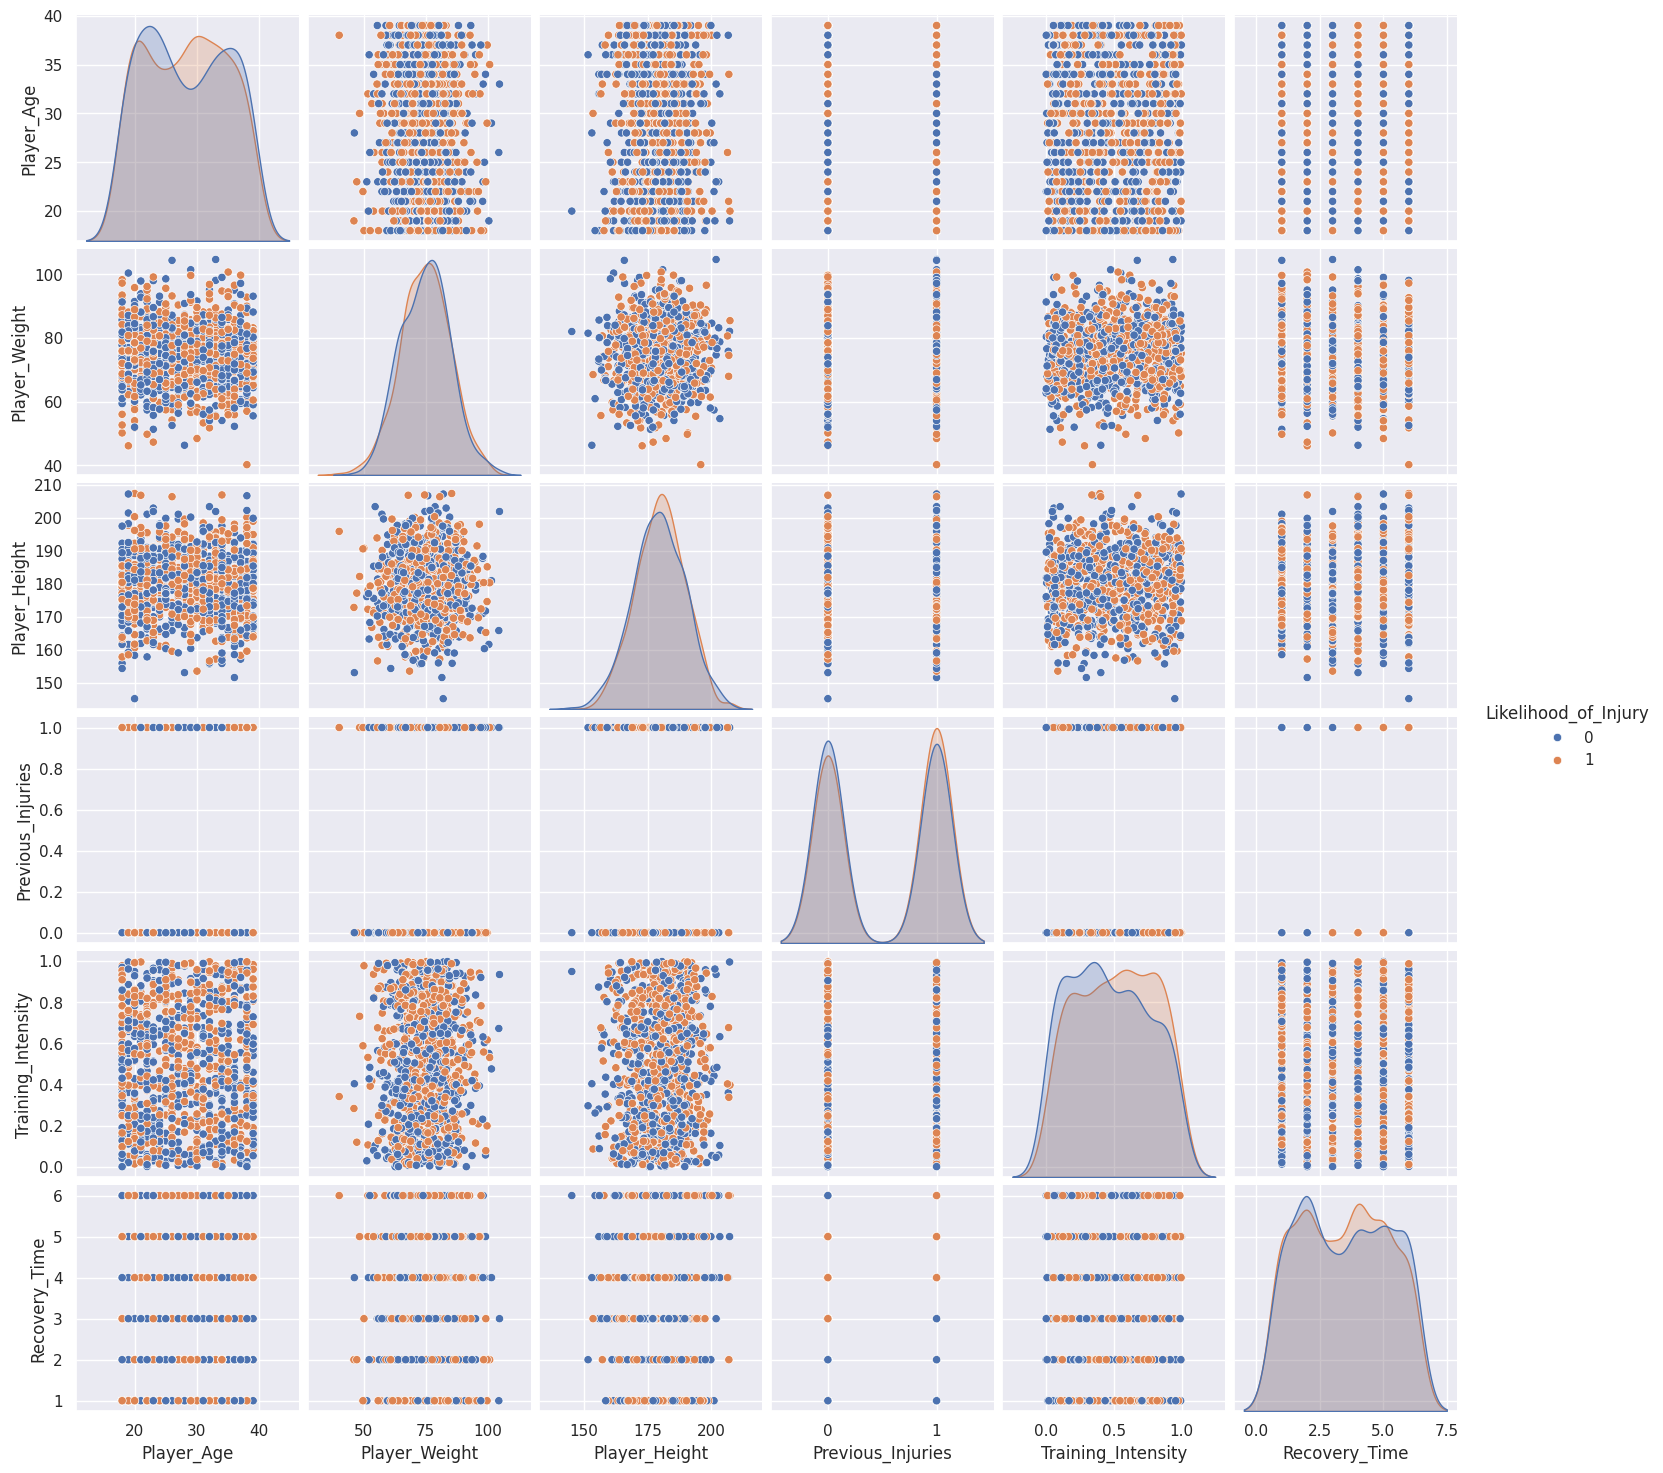

In [56]:
#visualisasi. warna dibedakan berdasarkan outcomenya apakah kemungkinan cedera atau tidak
sns.pairplot(injury, vars=['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries', 'Training_Intensity', 'Recovery_Time'], hue='Likelihood_of_Injury')

In [57]:
import seaborn as sns
import pandas as pd


# Menghitung korelasi antara setiap variabel dengan 'Likelihood_of_Injury'
correlation_with_outcome = injury.corr()['Likelihood_of_Injury'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'Likelihood_of_Injury'
print(correlation_with_outcome)

Likelihood_of_Injury    1.000000
Training_Intensity      0.089250
Previous_Injuries       0.038017
Player_Height           0.029639
Player_Weight           0.001843
Player_Age              0.000153
Recovery_Time          -0.015292
Name: Likelihood_of_Injury, dtype: float64


In [58]:
#memisahkan data menjadi variabel x dan y
X=injury.drop(['Likelihood_of_Injury'], axis=1)
y=injury['Likelihood_of_Injury']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.76190476 0.59612057 0.74426591 1.         0.26189978 0.6       ]
 [0.0952381  0.5197001  0.4411278  0.         0.94300075 0.6       ]
 [0.33333333 0.59696231 0.53327399 0.         0.83338885 0.8       ]
 ...
 [1.         0.42599681 0.3019324  1.         0.87627569 1.        ]
 [0.28571429 0.44677562 0.78941772 0.         0.20272571 0.2       ]
 [0.95238095 0.42378315 0.75780155 0.         0.61147217 0.6       ]]


In [61]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [62]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [63]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.57125

In [64]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score # Import the accuracy_score function

classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.5400


In [66]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [67]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 100}


In [68]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

In [69]:
y_pred = clf.predict(X_test)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.45      0.48       101
           1       0.51      0.60      0.55        99

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200



###**Akurasi**

In [71]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.52

###**Confusion Matrix**

In [72]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[45 56]
 [40 59]]


In [73]:
(cm[0,0]+cm[1,1])/np.sum(cm)

np.float64(0.52)

##**Visualisasi Hasil**

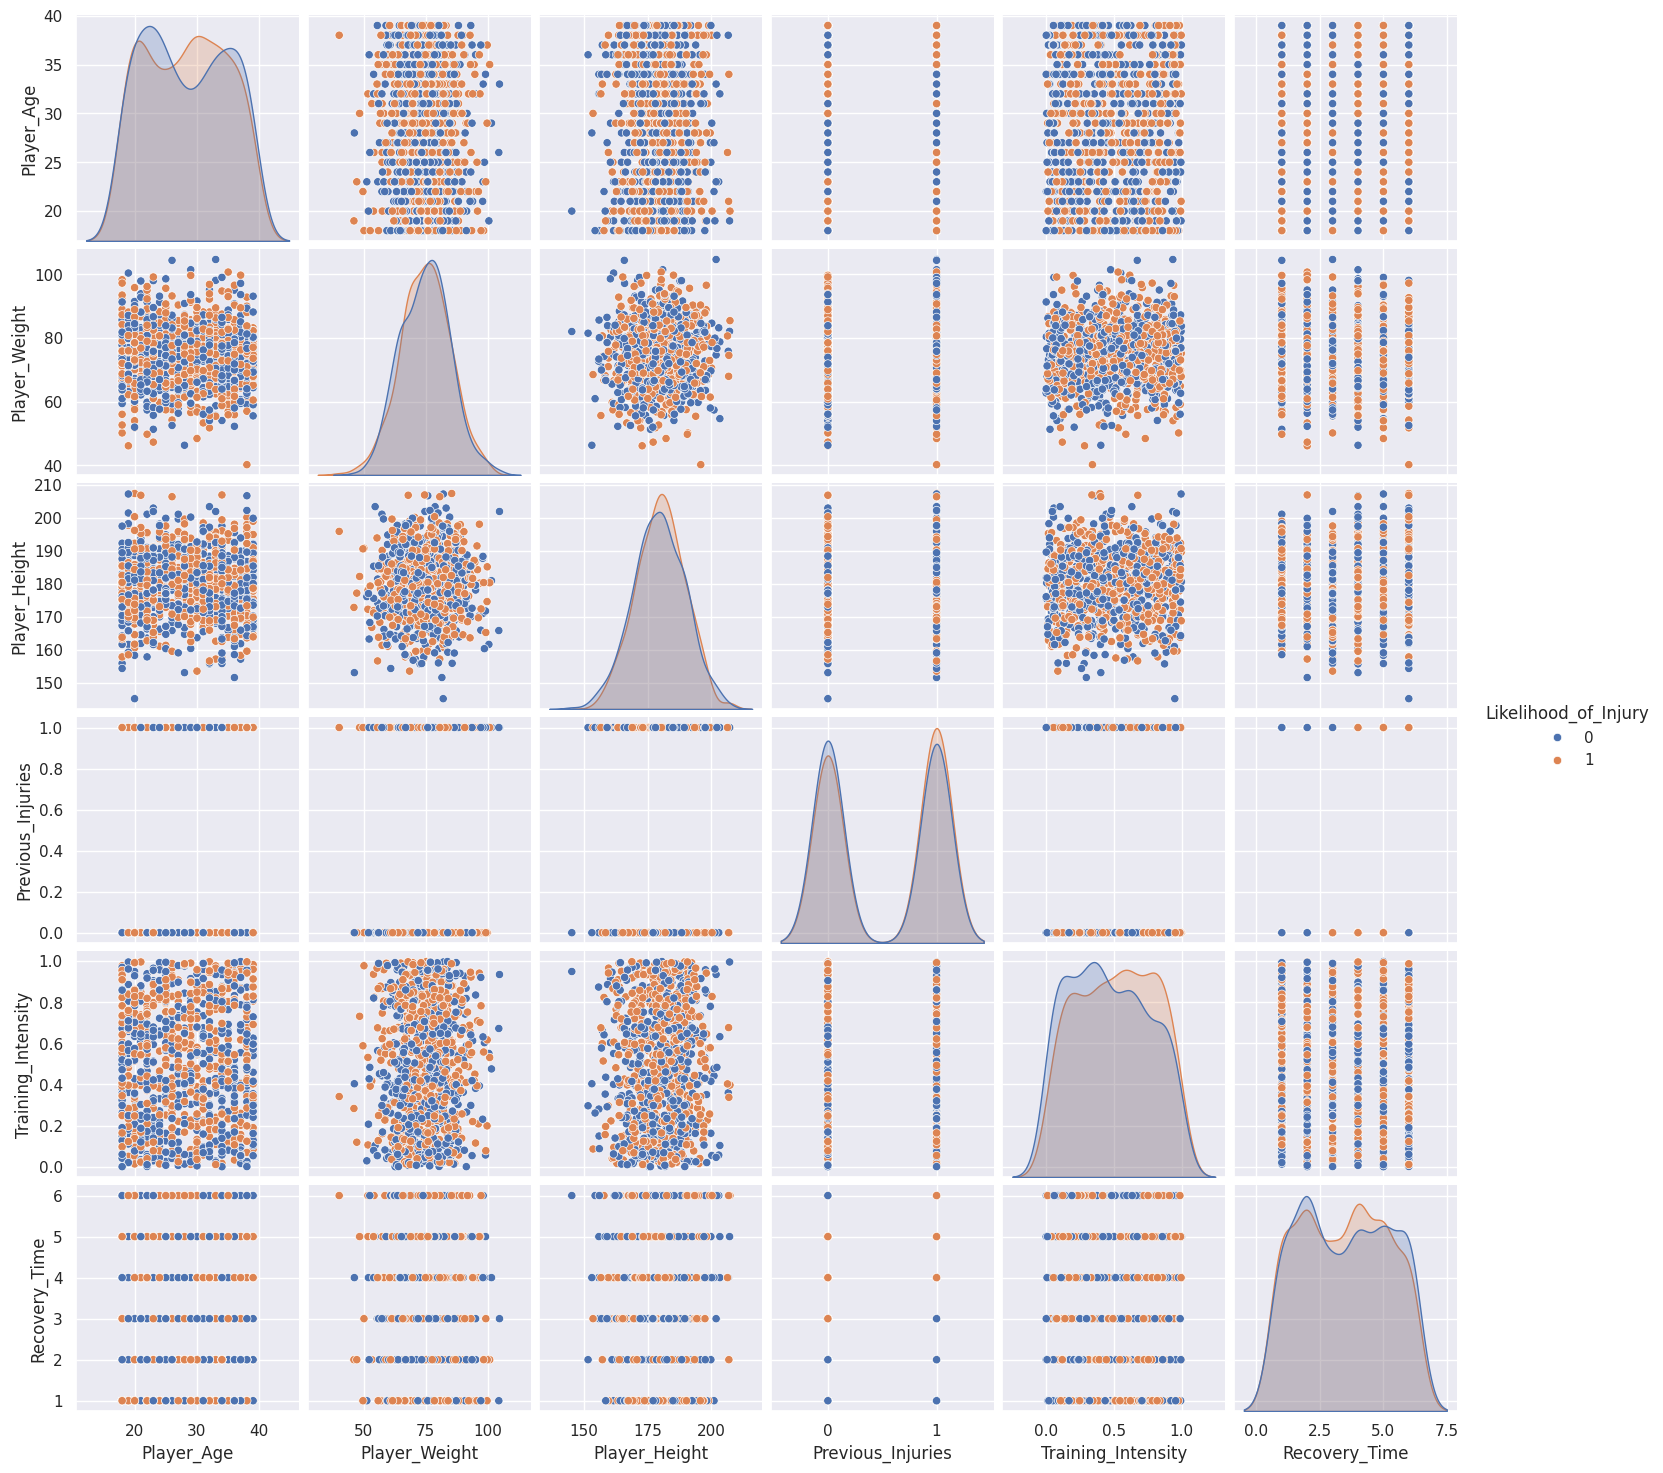

In [74]:
#visualisasi. warna dibedakan berdasarkan outcomenya apakah kemungkinan cedera atau tidak
sns.pairplot(injury, vars=['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries', 'Training_Intensity', 'Recovery_Time'], hue='Likelihood_of_Injury')

#**KNN**

##**Langkah-Langkah Pemodelan**

1. **Mengumpulkan dan Menyiapkan Data**  
   Langkah pertama adalah menyiapkan dataset yang akan digunakan. Data ini bisa berupa data mentah dari Kaggle. Setelah itu, dilakukan eksplorasi dan pembersihan data, seperti menghapus data yang kosong, mengatasi nilai outlier, atau melakukan encoding jika terdapat fitur kategorikal.

2. **Memisahkan Fitur dan Target**  
   Setelah data bersih, selanjutnya adalah memisahkan antara fitur (X) yang berisi informasi prediktor dan target (y) yang berisi label atau kelas yang ingin diprediksi.

3. **Membagi Dataset menjadi Data Latih dan Data Uji**  
   Data dibagi menjadi dua bagian, yaitu data latih (training set) dan data uji (testing set). Tujuannya adalah agar model dilatih pada sebagian data dan diuji performanya pada data yang belum pernah dilihat sebelumnya.

4. **Melakukan Normalisasi atau Standardisasi Data**  
   Karena KNN menghitung jarak antar data, maka penting untuk melakukan normalisasi atau standardisasi terhadap fitur numerik agar setiap fitur memiliki skala yang sama. Jika tidak dilakukan, fitur dengan nilai besar bisa mendominasi perhitungan jarak.

5. **Menentukan Nilai K (Jumlah Tetangga Terdekat)**  
   Nilai K menentukan berapa banyak tetangga terdekat yang digunakan untuk menentukan kelas dari data uji. Nilai K yang terlalu kecil bisa menyebabkan model terlalu sensitif (overfitting), sedangkan nilai K yang terlalu besar bisa membuat model terlalu umum (underfitting). Biasanya, nilai K ditentukan melalui eksperimen atau validasi silang (cross-validation).

6. **Melatih Model KNN**  
   Pada dasarnya, algoritma KNN tidak memiliki proses pelatihan seperti algoritma lainnya karena termasuk lazy learner. Data latih hanya disimpan dan akan digunakan saat proses prediksi.

7. **Melakukan Prediksi pada Data Uji**  
   Untuk memprediksi kelas suatu data uji, algoritma KNN akan menghitung jarak antara data uji dengan seluruh data latih menggunakan metrik tertentu seperti Euclidean Distance. Kemudian, KNN akan mengambil K data latih terdekat dan menentukan kelas mayoritas dari tetangga tersebut sebagai hasil prediksi.

8. **Evaluasi Model**  
   Setelah prediksi dilakukan, performa model dievaluasi menggunakan metrik evaluasi seperti akurasi dan confusion matrix. Evaluasi ini penting untuk melihat seberapa baik model mengenali pola pada data.

9. **Visualisasi Hasil (Opsional)**  
   Jika dataset memiliki dimensi rendah atau telah direduksi, hasil klasifikasi dapat divisualisasikan untuk melihat pembagian kelas dan batas keputusan model secara lebih jelas.

##**Evaluasi Model Menggunakan Confusion Matrix dan Akurasi**

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [91]:
df = pd.read_csv('/content/injury_data.csv')

In [105]:
injury.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [78]:
injury.tail(15)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
985,18,75.873311,180.442680,1,0.164287,5,1
986,32,82.024066,181.915393,0,0.783161,4,1
987,19,75.967499,174.402575,0,0.122498,6,1
988,31,73.904507,178.060506,0,0.634907,6,0
989,38,68.959877,173.366957,1,0.123846,5,1
990,25,83.846068,177.052207,0,0.070536,3,0
991,25,65.808199,193.461783,1,0.909430,6,1
992,36,63.896005,169.221282,0,0.190129,1,1
993,24,80.670555,173.112823,1,0.821250,4,1
994,36,61.668427,167.457011,0,0.544631,1,1


In [92]:
X = df.drop('Likelihood_of_Injury', axis=1)
y = df['Likelihood_of_Injury']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
y_pred = knn.predict(X_test_scaled)

###**Confusion Matrix**

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred)


In [99]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[56 39]
 [51 54]]


In [110]:
cm_percent = cm.astype('float') / cm.sum() * 100

In [112]:
cm_percent = cm.astype('float') / cm.sum() * 100
cm_percent_rounded = np.round(cm_percent, 2)

print("\nConfusion Matrix (Persentase %):")
print(cm_percent_rounded)


Confusion Matrix (Persentase %):
[[22.5 28. ]
 [20.  29.5]]


###**Akurasi**

In [98]:
accuracy = accuracy_score(y_test, y_pred)

In [108]:
print("\nAkurasi Model:", round(accuracy * 100, 2), "%")


Akurasi Model: 55.0 %


##**Visulasisasi**

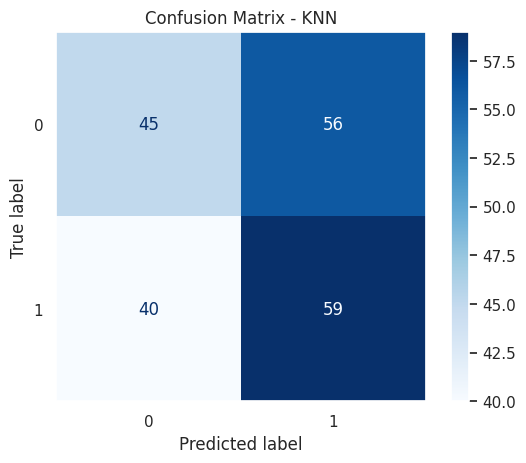

In [109]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.grid(False)
plt.show()

#**PERBANDINGAN HASIL NAIVE BAYES DAN KNN**

Berdasarkan hasil evaluasi yang diperoleh dari confusion matrix dan nilai akurasi, terlihat adanya perbedaan performa antara algoritma Naive Bayes dan KNN.  

Model KNN menunjukkan hasil klasifikasi yang sedikit lebih akurat dibandingkan Naive Bayes, terutama karena kemampuannya untuk menangkap pola kompleks berdasarkan kedekatan data antar titik. KNN mempertimbangkan data tetangga terdekat secara langsung, sehingga cocok ketika data memiliki distribusi yang tidak terlalu linier atau memiliki hubungan spasial yang kuat antar fitur.

Sementara itu, Naive Bayes bekerja berdasarkan perhitungan probabilitas dengan asumsi bahwa fitur saling independen. Meskipun sederhana dan cepat, performa Naive Bayes bisa menurun jika fitur-fitur dalam dataset saling bergantung atau jika distribusi data tidak menyerupai distribusi normal.

Dengan melihat hasil tersebut, dapat disimpulkan bahwa KNN memberikan hasil klasifikasi yang lebih baik untuk dataset ini dibandingkan dengan Naive Bayes, meskipun perlu diingat bahwa KNN membutuhkan waktu lebih lama untuk prediksi karena menghitung jarak ke semua data latih.